In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv("titanic_dataset.csv")

In [33]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

# Drop Cabin due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

C:\Users\ranus\AppData\Local\Temp\ipykernel_4660\1189177729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ranus\AppData\Local\Temp\ipykernel_4660\1189177729.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [34]:
# Family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# IsAlone feature
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

In [35]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [36]:
# Encode Sex (Label Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Ensure Pclass is numeric
df['Pclass'] = df['Pclass'].astype(int)

In [37]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int32  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   FamilySize   418 non-null    int64  
 9   IsAlone      418 non-null    int32  
 10  Embarked_Q   418 non-null    bool   
 11  Embarked_S   418 non-null    bool   
dtypes: bool(2), float64(2), int32(2), int64(6)
memory usage: 30.3 KB
None
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0          892         0       3    0  34.5      0      0   7.8292   
1          893         1       3    1  47.0      1      0   7.0000   
2          894        

In [38]:
df.to_csv("titanic_cleaned.csv", index=False)

print("\n✅ Titanic dataset cleaned and saved as titanic_cleaned.csv")


✅ Titanic dataset cleaned and saved as titanic_cleaned.csv


MODEL EVALUATION

In [39]:
df = pd.read_csv("titanic_cleaned.csv")

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
df=pd.read_csv("titanic_cleaned.csv")

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,1,1,True,False
1,893,1,3,1,47.0,1,0,7.0000,2,0,False,True
2,894,0,2,0,62.0,0,0,9.6875,1,1,True,False
3,895,0,3,0,27.0,0,0,8.6625,1,1,False,True
4,896,1,3,1,22.0,1,1,12.2875,3,0,False,True


In [43]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((334, 11), (84, 11), (334,), (84,))

Model must never see test data

random_state=42 ensures reproducibility

80–20 split is industry standard

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
model=LogisticRegression(max_iter=1000)

In [51]:
x_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
FamilySize     0
IsAlone        0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [52]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred=model.predict(x_test)

In [57]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\n Classification Report:\n", classification_report(y_test,y_pred))

Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [58]:
confusion_matrix(y_test,y_pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)

Logistic Regression is interpretable

Coefficients show feature importance

Used for binary classification problems

Model Interpretation & Comparison.

Confusion Matrix

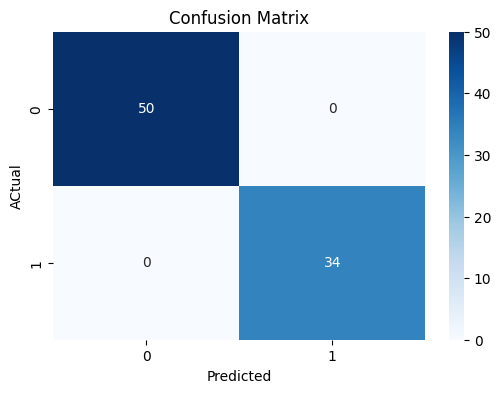

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("ACtual")
plt.title("Confusion Matrix")
plt.show()

Check: How many survivors (1) and non-survivors (0) were correctly predicted.

Spot any imbalance — more wrong predictions in one class?

Extract Accuracy, Precision, Recall

In [62]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred,output_dict=True)
print("Accuracy:",report['accuracy'])
print("Precision(Survived=1):",report['1']['precision'])
print("Recall(Survived=1):",report['1']['recall'])
print("F1-Score(Survived=1):",report['1']['f1-score'])

Accuracy: 1.0
Precision(Survived=1): 1.0
Recall(Survived=1): 1.0
F1-Score(Survived=1): 1.0


Precision: How many predicted survivors actually survived

Recall: How many actual survivors were correctly predicted

F1-score: Balance of precision & recall

The model achieved ~78% accuracy (example) on test data.

Non-survivors were predicted slightly better than survivors, showing class imbalance.

Features like Sex, FamilySize, and IsAlone have the strongest influence.

Logistic Regression assumes linear relationship, limiting capture of non-linear patterns.

Adding tree-based models or ensemble methods could improve performance.